In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
crime = pd.read_csv('RRS crime Data.csv')
crime.head(10)

,Dates,Times,Crime_types,Locations,LCDAs,population
0,11/18/2019,2:50:00,Fire Outbreak,Sala Street,Isolo,4814647.0
1,11/18/2019,2:55:00,Robbery,"21 Maiyaki street, Isokoko",Agege,4383983.0
2,11/18/2019,3:00:00,Robbery,43 Oduduwa Street. Iyana Oworo,Kosofe,3996193.0
3,11/18/2019,3:50:00,Robbery,Opewale Street,Agege,4383983.0
4,11/18/2019,21:45:00,Robbery,"Suliaman Street, Agunji",Eti-Osa East,4173713.0
5,11/18/2019,20:55:00,Accident,Ijora bridge,Apapa,2216825.0
6,11/19/2019,5:05:00,Fire Outbreak,16 Baale Street Ajao Estate,Oshodi,4814647.0
7,11/19/2019,5:25:00,Robbery,"Olawole Street, VI",Eti-Osa East,4173713.0
8,11/19/2019,5:30:00,Accident,Alaro city,Lekki,422415.0
9,11/19/2019,10:20:00,Accident,Ojodu Berger,Ojodu Berger,2752953.0


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dates        1428 non-null   object 
 1   Times        1420 non-null   object 
 2   Crime_types  1428 non-null   object 
 3   Locations    1395 non-null   object 
 4   LCDAs        1389 non-null   object 
 5   population   1392 non-null   float64
dtypes: float64(1), object(5)
memory usage: 67.1+ KB


In [4]:
# missing values
crime.isna().sum()

Dates           0
Times           8
Crime_types     0
Locations      33
LCDAs          39
population     36
dtype: int64

In [5]:
# data cardinality

lis3=[]
for i in crime:
    lis3.append(crime[str(i)].nunique())

cardinal=pd.DataFrame(lis3,crime.columns).reset_index()
cardinal=cardinal.rename(columns={'index':'Features',0:'cardinality'})

cardinal

,Features,cardinality
0,Dates,600
1,Times,555
2,Crime_types,10
3,Locations,1331
4,LCDAs,42
5,population,22


In [6]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1392.0,4.543722e+06,2.152264e+06,422415.0,2924079.0,3996193.0,5407971.0,8686902.0


In [7]:
# Dealing with Missing Values

# Exploratory Data Analysis (EDA) and Feature Engineering 

Extracting feature from Time and Dates column to create new column to the datasets to gain more insight and to have robost data.

In [8]:
# creating function to extract time of the day in the data

def categorize_time_of_day(crime,Times):
    # Convert time column to datetime format
    crime['Times'] = pd.to_datetime(crime['Times'])

    # Define time of day categories
    times_of_day = {
        'Morning': range(6, 12),
        'Afternoon': range(12, 17),
        'Evening': range(18, 23),
        'Midnight': range(0, 5)
    }

    # Create a new column with the time of day category for each row
    crime['Time of Day'] = pd.cut(crime[Times].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Midnight', 'Morning', 'Afternoon', 'Evening'])

    # Extract time portion from datetime format
    crime[Times] = crime[Times].dt.time
    
    return crime

crime = categorize_time_of_day(crime, 'Times')


In [9]:
crime.head()

,Dates,Times,Crime_types,Locations,LCDAs,population,Time of Day
0,11/18/2019,02:50:00,Fire Outbreak,Sala Street,Isolo,4814647.0,Midnight
1,11/18/2019,02:55:00,Robbery,"21 Maiyaki street, Isokoko",Agege,4383983.0,Midnight
2,11/18/2019,03:00:00,Robbery,43 Oduduwa Street. Iyana Oworo,Kosofe,3996193.0,Midnight
3,11/18/2019,03:50:00,Robbery,Opewale Street,Agege,4383983.0,Midnight
4,11/18/2019,21:45:00,Robbery,"Suliaman Street, Agunji",Eti-Osa East,4173713.0,Evening


In [10]:
#convert date column to datetime

crime['Dates']=pd.to_datetime(crime['Dates'])

# Extract

crime['day']=crime['Dates'].dt.day_name()
crime['Month']=crime['Dates'].dt.month_name()
crime['year']=crime['Dates'].dt.year
crime['day_of_week']=crime['Dates'].dt.dayofweek
crime['quarter'] = crime['Dates'].dt.quarter



Extract season by creating  function that maps the month to the corresponding season

In [11]:
def get_season(month):
    if month in [11, 12, 1, 2, 3]:
        return 'dry season'
    elif month in [4,5,6,7,8,9,10]:
        return 'raining season'

crime['season'] = crime['Dates'].dt.month.apply(get_season)

Create  dictionary of Nigerian holidays from 2019 - 2022 and use it to create a new column indicating whether a particular date is a holiday or not

In [12]:
import datetime

nigeria_holidays = {
    datetime.date(2019, 12, 25): "Christmas Day",
    datetime.date(2019, 12, 26): "Boxing Day",
    
    datetime.date(2020, 1, 1): "New Year Day",
    datetime.date(2020, 4, 10): "Good Friday",
    datetime.date(2020, 4, 13): "Easter Monday",
    datetime.date(2020, 5, 1): "Workers' Day",
    datetime.date(2020, 5, 25): "Id el Fitr holiday",
    datetime.date(2020, 5, 26): "Id el Fitr holiday",
    datetime.date(2020, 6, 12): "Democracy Day",
    datetime.date(2020, 7, 30): "Id el Kabir additional holiday",
    datetime.date(2020, 7, 31): "Id el Kabir",
    datetime.date(2020, 10, 1): "National Day",
    datetime.date(2020, 10, 29): "Id el Maulud",
    datetime.date(2020, 12, 25): "Christmas Day",
    datetime.date(2020, 12, 26): "Boxing Day",
    
    datetime.date(2021, 1, 1): "New Year Day",
    datetime.date(2021, 4, 2): "Good Friday",
    datetime.date(2021, 4, 5): "Easter Monday",
    datetime.date(2021, 5, 1): "Workers' Day",
    datetime.date(2021, 5, 3): "Day off for Workers Day",
    datetime.date(2021, 5, 12): "Id el Fitr holiday",
    datetime.date(2021, 5, 13): "Id el Fitr holiday",
    datetime.date(2021, 6, 12): "Democracy Day",
    datetime.date(2021, 6, 14): "Day off for Democracy Day",
    datetime.date(2021, 7, 20): "Id el Kabir",
    datetime.date(2021, 7, 21): "Id el Kabir additional holiday",
    datetime.date(2021, 10, 1): "National Day",
    datetime.date(2021, 10, 19): "Id el Maulud",
    datetime.date(2021, 12, 25): "Christmas Day",
    datetime.date(2021, 12, 26): "Boxing Day",
    datetime.date(2021, 12, 27): "Day off for Christmas Day",
    datetime.date(2021, 12, 28): "Day off for Boxing Day",
    
    datetime.date(2022, 1, 1): "New Year Day",
    datetime.date(2022, 4, 15): "Good Friday",
    datetime.date(2022, 4, 18): "Easter Monday",
    datetime.date(2022, 5, 1): "Workers' Day",
    datetime.date(2022, 5, 2): "Day off for Workers Day",
    datetime.date(2022, 5, 2): "Id el Fitr holiday",
    datetime.date(2022, 5, 3): "Id el Fitr holiday",
    datetime.date(2022, 6, 12): "Democracy Day",
    datetime.date(2022, 6, 13): "Day off for Democracy Day",
    datetime.date(2022, 7, 9): "Id el Kabir",
    datetime.date(2022, 7, 11): "Id el Kabir additional holiday",
    datetime.date(2022, 7, 12): "Id el Kabir additional holiday",
    datetime.date(2022, 10, 1): "National Day",
    datetime.date(2022, 10, 3): "Day off for National Day",
    datetime.date(2022, 10, 8): "Id el Maulud",
    datetime.date(2022, 10, 10): "Id el Kabir additional holiday",
    datetime.date(2022, 10, 11): "Id el Kabir additional holiday",
    datetime.date(2022, 12, 25): "Christmas Day",
    datetime.date(2022, 12, 26): "Boxing Day",
    datetime.date(2022, 12, 27): "Day off for Christmas Day",
}

def is_holiday(date):
    return date in nigeria_holidays

crime['IsHoliday'] = crime['Dates'].apply(lambda x: is_holiday(x.date()))


In [13]:
crime['Times'] = pd.to_datetime(crime['Times'], format='%H:%M:%S')
 # Extract time portion from datetime format
crime['Times'] = crime['Times'].dt.time

# Advance EDA with Pandas Profiling

In [14]:
#Pandas Profiling for Descriptive Analysis
from pandas_profiling import ProfileReport
data = ProfileReport(crime)
data

In [15]:
#Save Profile Repot as HTML file

data.to_file('crime_report.html')

In [16]:
#Save Dataset for further Analysis

crime.to_csv('nue_crime_data.csv', index=False)

In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dates        1428 non-null   datetime64[ns]
 1   Times        1420 non-null   object        
 2   Crime_types  1428 non-null   object        
 3   Locations    1395 non-null   object        
 4   LCDAs        1389 non-null   object        
 5   population   1392 non-null   float64       
 6   Time of Day  1337 non-null   category      
 7   day          1428 non-null   object        
 8   Month        1428 non-null   object        
 9   year         1428 non-null   int64         
 10  day_of_week  1428 non-null   int64         
 11  quarter      1428 non-null   int64         
 12  season       1428 non-null   object        
 13  IsHoliday    1428 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 137.0+ KB


# Dealing with missing Values

In [18]:
# Use spline interpolation to fill missing values in the 'Times' column
    
crime['Time of Day'] = crime['Time of Day'].fillna('Midnight')

crime['Times'] = crime['Times'].interpolate(method='nearest')

crime = crime.dropna(subset=['LCDAs'])
crime = crime.dropna(subset=['Locations'])
crime = crime.dropna(subset=['Times'])



In [19]:
crime.isna().sum()

Dates          0
Times          0
Crime_types    0
Locations      0
LCDAs          0
population     0
Time of Day    0
day            0
Month          0
year           0
day_of_week    0
quarter        0
season         0
IsHoliday      0
dtype: int64

# Crime Data Analysis

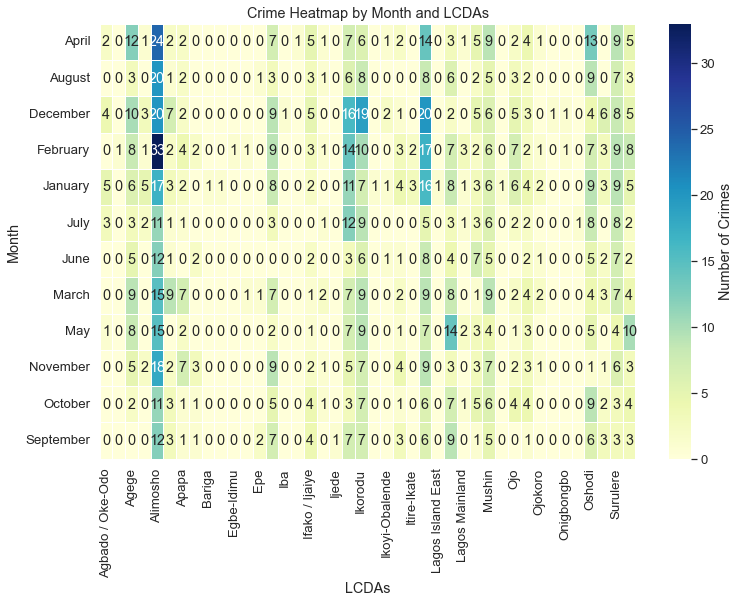

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
crime['LCDAs'] = crime['LCDAs'].astype('category')

# aggregate data by month and location

crime_agg = crime.groupby(['Month', 'LCDAs'])['Crime_types'].count().reset_index()
crime_pivot = crime_agg.pivot('Month', 'LCDAs', 'Crime_types')

# create heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(crime_pivot, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Crimes'})
plt.title('Crime Heatmap by Month and LCDAs')
plt.xlabel('LCDAs')
plt.ylabel('Month')
plt.show()


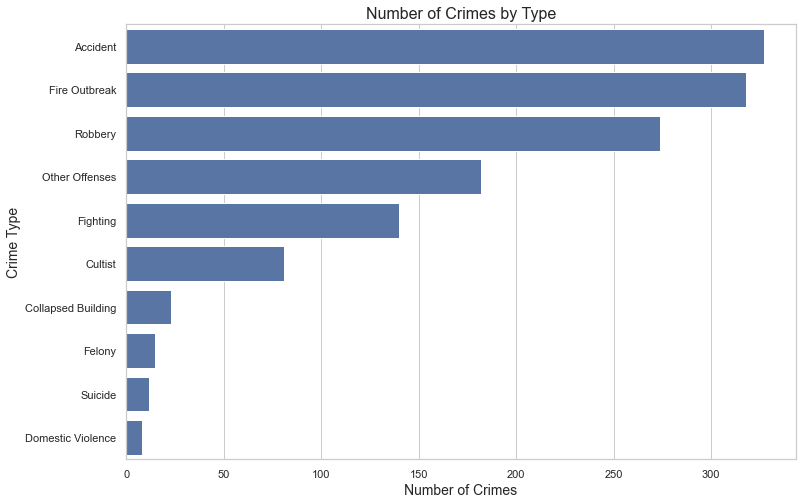

In [20]:
# Group the dataset by "Primary Type" and count the number of crimes
crime_count = crime.groupby("Crime_types")["Crime_types"].count().reset_index(name="count")
crime_count = crime_count.sort_values("count", ascending=False)

# Create a horizontal bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="Crime_types", data=crime_count, color="b")
ax.set_xlabel("Number of Crimes", fontsize=14)
ax.set_ylabel("Crime Type", fontsize=14)
ax.set_title("Number of Crimes by Type", fontsize=16)
plt.show()


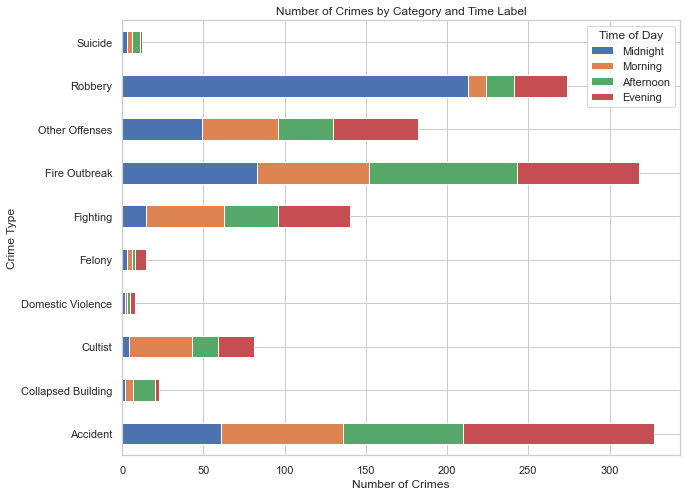

In [21]:
# Use value_counts to get the number of crimes

num_crimes = crime['Crime_types'].value_counts()

# Use groupby to get the number of crimes by category and time label
num_crimes_by_time = crime.groupby(['Crime_types', 'Time of Day']).size().unstack(fill_value=0)

# Create a horizontal bar chart of crime categories and time labels
sns.set(style="whitegrid")
num_crimes_by_time.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.title('Number of Crimes by Category and Time Label')

plt.show()


In [ ]:
# Group the data by season and crime type
num_crimes_season = crime.groupby(['Crime_types','season']).size().unstack(fill_value=0)

# Create a horizontal bar chart of crime categories and season labels
sns.set(style="whitegrid")
num_crimes_season.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.title('Number of Crimes by Category and Season')

plt.show()


In [ ]:
# Group the data by holiday status and crime category

grouped_data = crime.groupby(['Crime_types','IsHoliday']).size().unstack(fill_value=0)

# Plot the results
sns.set(style="whitegrid")
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Holiday Status')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Holiday Status and Category')

# Show the chart
plt.show()

In [ ]:
# Create a histogram to check distribution of Crime Type

crime['Crime_types'] = crime['Crime_types'].astype(str)
plt.xticks(rotation=90)

# group the data by crime type, and count the number of incidents
num_crimes = crime['Crime_types'].value_counts()

plt.hist(crime['Crime_types'], bins=20)
plt.xlabel('Crime_count')
plt.ylabel('Frequency')
plt.title('Distribution of Crime Count')
plt.show()


In [ ]:
sns.displot(data=crime, x='Crime_types', binwidth=1, height=5, aspect=3)
plt.xticks(rotation=90)

# Add plot and axis titles
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')

plt.show()

In [ ]:
#convert Object Data to Category

crime['Crime_types'] = crime['Crime_types'].astype('category')
crime['Month']=crime['Month'].astype('category')
crime['season']=crime['season'].astype('category')
crime['population']=crime['population'].astype(int)

In [ ]:
#encode categorical variable

from sklearn.preprocessing import LabelEncoder
for i in ['Crime_types', 'Time of Day', 'Month', 'season', 'IsHoliday']:
  encoder = LabelEncoder()
  crime[str(i)] = encoder.fit_transform(crime[str(i)])
    
#Drop duplicate column

crime.drop(['day'], axis=1, inplace= True)

In [ ]:
crime['LCDAs'] = crime['LCDAs'].map(crime['LCDAs'].value_counts().to_dict())
crime['Locations'] = crime['Locations'].map(crime['Locations'].value_counts().to_dict())



In [ ]:
crime.Crime_types.plot(kind='density')

In [ ]:
crime.Crime_types.plot(kind='density')

In [ ]:
sns.displot(data=crime, x='Crime_types', binwidth=1, height=5, aspect=3)
plt.xticks(rotation=90)

# Add plot and axis titles
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')

plt.show()

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier

## What is SMOTE?
SMOTE is an over-sampling method which means it adds more samples from under-represented classes. So basically it creates synthetic samples of the minority class.